In [ ]:
%pip install pandas seaborn matplotlib scipy

In [38]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import MaxNLocator


In [39]:
DATASET = os.path.join("dataset", "football_matches_2024_2025.csv")

In [40]:
df: pd.DataFrame = pd.read_csv(DATASET, encoding='utf-8')

In [41]:
df.size

44643

In [43]:

vars_sel = ["total_goals", "goal_difference", "halftime_home"]
subset = df[vars_sel]

# Estatísticas básicas
describe_df = subset.agg(['mean', 'median', 'std']).T
print("Estatísticas (média, mediana, desvio padrão):")
print(describe_df)

# Matriz de covariância 3x3
cov_matrix = subset.cov()
print("\nMatriz de Covariância:")
print(cov_matrix)

Estatísticas (média, mediana, desvio padrão):
                     mean  median       std
total_goals      2.875837     3.0  1.693997
goal_difference  0.195775     0.0  1.880667
halftime_home    0.700000     1.0  0.860394

Matriz de Covariância:
                 total_goals  goal_difference  halftime_home
total_goals         2.869627         0.296485       0.753997
goal_difference     0.296485         3.536910       0.838886
halftime_home       0.753997         0.838886       0.740278


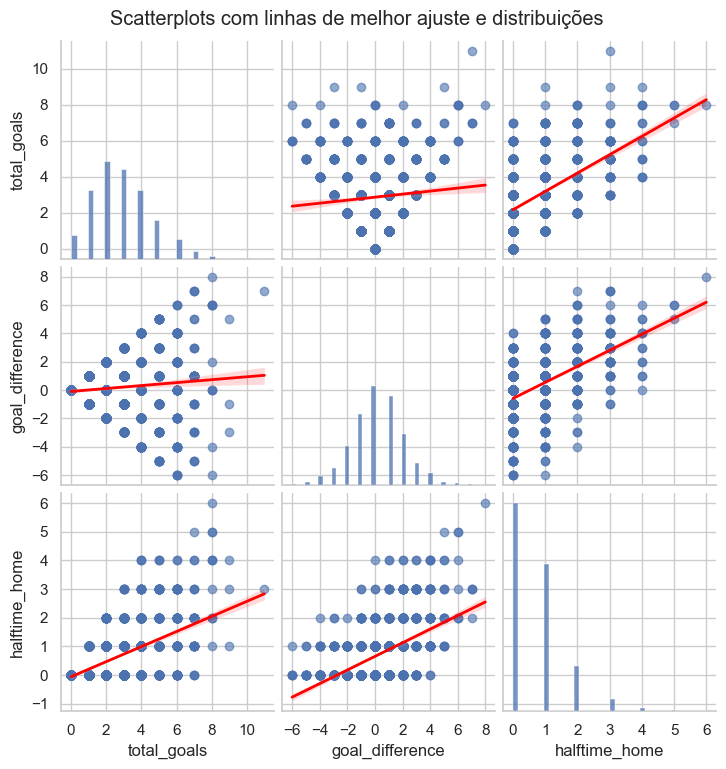

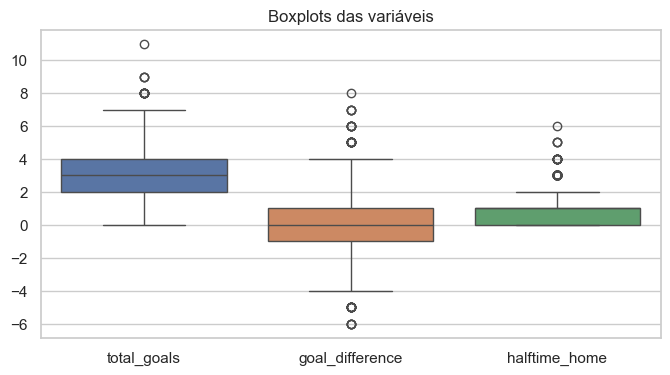

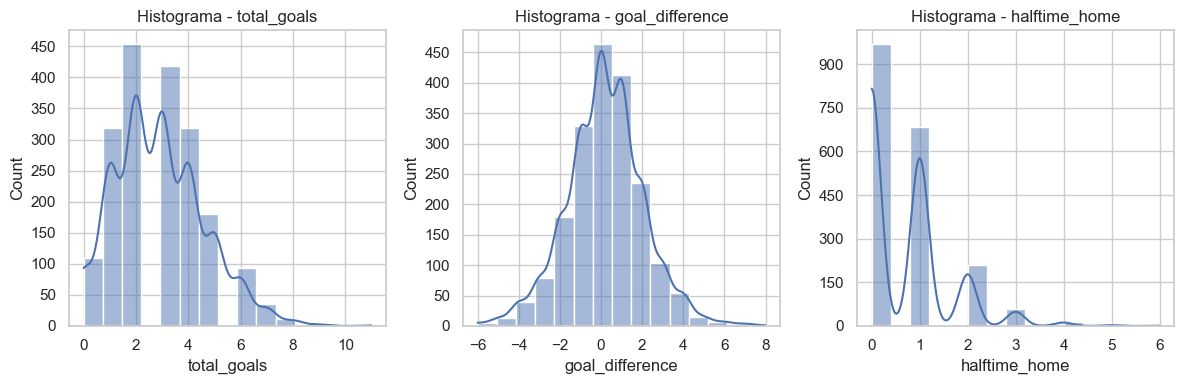

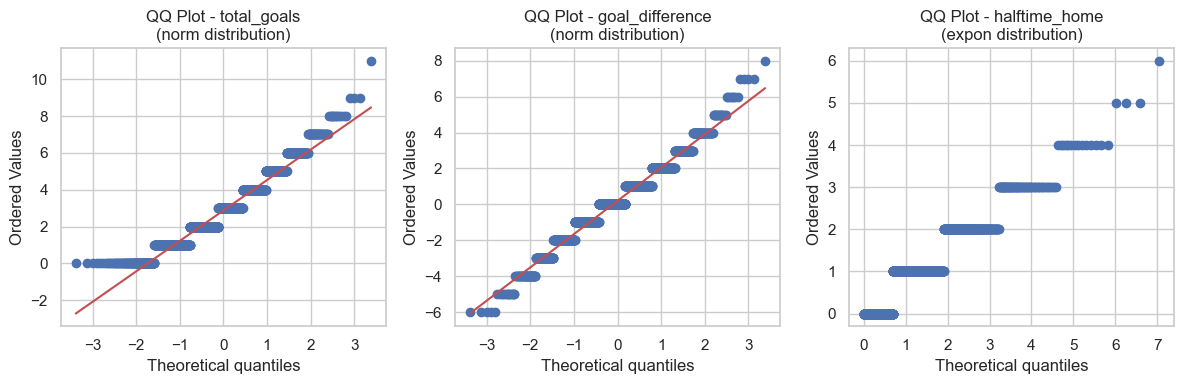

In [44]:
# Scatterplot pairwise (pairplot) com linhas de regressão (melhor ajuste linear)
g = sns.pairplot(
    subset,
    kind="reg",
    diag_kind="hist",
    plot_kws={
        'line_kws': {'color': 'red', 'linewidth': 2},
        'scatter_kws': {'alpha': 0.6}
    }
)
# Forçar apenas inteiros nos eixos
for ax in g.axes.flatten():
    if ax is not None:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.suptitle("Scatterplots com linhas de melhor ajuste e distribuições", y=1.02)
plt.show()

# Boxplots
plt.figure(figsize=(8,4))
sns.boxplot(data=subset)
plt.title("Boxplots das variáveis")
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Histogramas individuais
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for ax, col in zip(axes, subset.columns):
    sns.histplot(subset[col], kde=True, ax=ax, bins=15)
    ax.set_title(f"Histograma - {col}")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# QQ Plots
# Mantendo lógica de distribs

distribs = ["norm", "norm", "expon"]

fig, axes = plt.subplots(1, 3, figsize=(12,4))
for ax, col, dist in zip(axes, subset.columns, distribs):
    stats.probplot(subset[col], dist=dist, plot=ax)
    ax.set_title(f"QQ Plot - {col}\n({dist} distribution)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()